## Group No

## Group Member Names:
1. 
2.
3.


# 1. Business Understanding
 
Students are expected to identify a classification problem of your choice. You have to detail the Business Understanding part of your problem under this heading which basically addresses the following questions.
 
   1. What is the problem that you are trying to solve?
   2. What data do you need to answer the above problem?


--------------Type the answers below this line-------------- 

1. **Problem statement**: CarDekho.com is a website and mobile application which facilitates its users to buy right vehicles for them. It does this through a user-friendly website and mobile app that carry rich automotive content such as expert reviews, details of all specs and prices, comparisons as well as videos and pictures of all brands and models available in India. 

Create a regression model, given a new individual observation, predict the selling price for an used car model.

2. The dataset, car data.csv is taken from Kaggle. It has been uploaded to canvas.

https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

The columns in the given dataset are as follows:

* name
* year
* selling_price
* km_driven
* fuel
* seller_type
* transmission
* Owner

# 2. Data Acquisition
 
For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Download the data directly

## 2.2 Code for converting the above downloaded data into a dataframe


In [1]:
##---------Type the code below this line------------------##
import pandas as pd

dataset = pd.read_csv("cardata.csv")

dataset.shape

(301, 9)

In [2]:
##---------Type the code below this line------------------##

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


## 2.3 Confirm the data has been correctly by displaying the first 5

In [3]:
##---------Type the code below this line------------------##
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# 3. Data Preparation

## 3.1 Remove null data

In [4]:
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
# check for duplicates

duplicateRows = dataset[dataset.duplicated(keep = 'last')]
print('Duplicates', duplicateRows.shape)
print('Original dataset', dataset.shape)

Duplicates (2, 9)
Original dataset (301, 9)


In [6]:
# remove duplicates

dataset = dataset.drop_duplicates()
print('Modified dataset', dataset.shape)

Modified dataset (299, 9)


## 3.2 Encode categorical data

In [7]:
from sklearn.preprocessing import LabelEncoder

lb1 = LabelEncoder()
dataset['Car_Name'] = lb1.fit_transform(dataset['Car_Name'])

lb2 = LabelEncoder()
dataset['Seller_Type'] = lb2.fit_transform(dataset['Seller_Type'])

lb3 = LabelEncoder()
dataset['Fuel_Type'] = lb3.fit_transform(dataset['Fuel_Type'])

lb4 = LabelEncoder()
dataset['Transmission'] = lb4.fit_transform(dataset['Transmission'])


## 3.3 Feature Engg on X or the sentences using CountVectorizer

In [8]:
''' creating two additional features, 
1. **Company** - Created with the help of the Car_Name. 
Ex: Car_Name: i20 -> Company: Hyundai.
Let's use a map of brand names to car model mapping. 
Note: this map is constructed manually
'''

company = {
    'Maruti Suzuki': ['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza', 's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis', '800', 'baleno', 'omni', 'Suzuki Access 125'],
    'Toyota': ['fortuner', 'innova', 'corolla altis', 'etios cross', 'etios g', 'etios liva', 'corolla', 'corolla altis', 'etios gd', 'camry', 'land cruiser'],
    'Honda': ['amaze', 'brio', 'city', 'jazz', 'Activa 3g', 'Activa 4g', 'Honda Activa 125', 'Honda Activa 4G', 'Honda CB Hornet 160R', 'Honda CB Shine', 'Honda CB Trigger', 'Honda CB Unicorn', 'Honda CB twister', 'Honda CBR 150', 'Honda Dream Yuga ', 'Honda Karizma'],
    'Hyundai': ['grand i10', 'i10', 'i20', 'creta', 'elantra', 'eon', 'verna', 'xcent'],
    'Hero': ['Hero  CBZ Xtreme', 'Hero  Ignitor Disc', 'Hero Extreme', 'Hero Glamour', 'Hero Honda CBZ extreme', 'Hero Honda Passion Pro', 'Hero Hunk', 'Hero Passion Pro', 'Hero Passion X pro', 'Hero Splender Plus', 'Hero Splender iSmart', 'Hero Super Splendor'],
    'Royal Enfield': ['Royal Enfield Bullet 350', 'Royal Enfield Classic 350', 'Royal Enfield Classic 500', 'Royal Enfield Thunder 350', 'Royal Enfield Thunder 500'],
    'UM': ['UM Renegade Mojave'],
    'KTM': ['KTM 390 Duke ', 'KTM RC200', 'KTM RC390'],
    'Bajaj': ['Bajaj  ct 100', 'Bajaj Avenger 150', 'Bajaj Avenger 150 street', 'Bajaj Avenger 220', 'Bajaj Avenger 220 dtsi', 'Bajaj Avenger Street 220', 'Bajaj Discover 100', 'Bajaj Discover 125', 'Bajaj Dominar 400', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 135 LS', 'Bajaj Pulsar 150', 'Bajaj Pulsar 220 F', 'Bajaj Pulsar NS 200', 'Bajaj Pulsar RS200'],
    'Hyosung': ['Hyosung GT250R'],
    'Mahindra': ['Mahindra Mojo XT300'],
    'TVS': ['TVS Apache RTR 160', 'TVS Apache RTR 180', 'TVS Jupyter', 'TVS Sport ', 'TVS Wego'],
    'Yahama': ['Yamaha FZ  v 2.0', 'Yamaha FZ 16', 'Yamaha FZ S ', 'Yamaha FZ S V 2.0', 'Yamaha Fazer ']
}

def find_company(vehicle):
    found = False
    for k in company.keys():
        if vehicle in company[k]: 
            return k
    if not found: return None

dataset['Company'] = dataset['Car_Name'].apply(find_company)

lb5 = LabelEncoder()
dataset['Company'] = lb5.fit_transform(dataset['Company'])

# 2. **Year Delta** - Represents the delta of current year and the year of manufacture

from datetime import date, datetime

dataset['YearDelta'] = dataset.apply(lambda x: date.today().year - x['Year'], axis=1)

In [9]:
from sklearn.preprocessing import MinMaxScaler

std_scaler1 = MinMaxScaler()
std_scaler2 = MinMaxScaler()

dataset['Present_Price'] = std_scaler1.fit_transform(dataset['Present_Price'].values.reshape(-1, 1))
dataset['Kms_Driven'] = std_scaler2.fit_transform(dataset['Kms_Driven'].values.reshape(-1, 1))

## 3.4 Identify the target variables.


In [10]:
X = dataset.copy()
y = X['Selling_Price']
X.drop('Selling_Price', axis=1, inplace=True)
X.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Company,YearDelta
0,90,2014,0.057109,0.053053,2,0,1,0,0,8.0
1,93,2013,0.099913,0.085085,1,0,1,0,0,9.0
2,68,2017,0.103273,0.012813,2,0,1,0,0,5.0
3,96,2011,0.041504,0.009409,2,0,1,0,0,11.0
4,92,2014,0.070980,0.083984,1,0,1,0,0,8.0


In [11]:
print(X.shape)
print(y.shape)

(299, 10)
(299,)


## 3.5 Split the data into training set and testing set

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(239, 10)
(239,)
(60, 10)
(60,)


# 4. Deep Neural Network Architecture

## 4.1 Design the architecture that you will be using to solve the prediction problem identified.

* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.

In [14]:
from keras.models import Sequential
from keras import layers

2022-11-27 10:20:32.773053: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-27 10:20:32.773122: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [15]:
input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(8, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1))

2022-11-27 10:20:34.348283: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-27 10:20:34.348312: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-27 10:20:34.348339: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (seetha-HP-348-G4): /proc/driver/nvidia/version does not exist
2022-11-27 10:20:34.348621: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 88        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


# 5. Training the model

## 5.1 Configure the training

Configure the model for training, by using appropriate optimizers and regularizations

In [17]:
model.compile(loss='mean_squared_error', 
              optimizer='adam', 
              metrics=['accuracy'])


## 5.2 Train the model

In [18]:
classifier_nn = model.fit(X_train,y_train,
                    epochs=200,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=15)

Epoch 1/200
16/16 [==============================] - 1s 13ms/step - loss: 133769.9844 - accuracy: 0.0000e+00 - val_loss: 123279.3359 - val_accuracy: 0.0000e+00
Epoch 2/200
16/16 [==============================] - 0s 4ms/step - loss: 112898.3906 - accuracy: 0.0000e+00 - val_loss: 104007.0938 - val_accuracy: 0.0000e+00
Epoch 3/200
16/16 [==============================] - 0s 4ms/step - loss: 95144.1328 - accuracy: 0.0000e+00 - val_loss: 87761.0156 - val_accuracy: 0.0000e+00
Epoch 4/200
16/16 [==============================] - 0s 4ms/step - loss: 80249.8281 - accuracy: 0.0000e+00 - val_loss: 74179.4609 - val_accuracy: 0.0000e+00
Epoch 5/200
16/16 [==============================] - 0s 4ms/step - loss: 67819.4766 - accuracy: 0.0000e+00 - val_loss: 62831.8047 - val_accuracy: 0.0000e+00
Epoch 6/200
16/16 [==============================] - 0s 3ms/step - loss: 57431.7773 - accuracy: 0.0000e+00 - val_loss: 53337.1758 - val_accuracy: 0.0000e+00
Epoch 7/200
16/16 [==============================] - 

Epoch 107/200
16/16 [==============================] - 0s 3ms/step - loss: 41.4219 - accuracy: 0.0000e+00 - val_loss: 61.5923 - val_accuracy: 0.0000e+00
Epoch 108/200
16/16 [==============================] - 0s 3ms/step - loss: 41.3057 - accuracy: 0.0000e+00 - val_loss: 61.4675 - val_accuracy: 0.0000e+00
Epoch 109/200
16/16 [==============================] - 0s 3ms/step - loss: 41.1954 - accuracy: 0.0000e+00 - val_loss: 61.3473 - val_accuracy: 0.0000e+00
Epoch 110/200
16/16 [==============================] - 0s 3ms/step - loss: 41.0900 - accuracy: 0.0000e+00 - val_loss: 61.2301 - val_accuracy: 0.0000e+00
Epoch 111/200
16/16 [==============================] - 0s 3ms/step - loss: 40.9883 - accuracy: 0.0000e+00 - val_loss: 61.1157 - val_accuracy: 0.0000e+00
Epoch 112/200
16/16 [==============================] - 0s 3ms/step - loss: 40.8898 - accuracy: 0.0000e+00 - val_loss: 61.0052 - val_accuracy: 0.0000e+00
Epoch 113/200
16/16 [==============================] - 0s 3ms/step - loss: 40.7908

# 6. Test the model

In [19]:
# Predict Labels
testLoss, testAccuracy = model.evaluate(X_test, y_test, verbose=0)

# Predict Labels
Ypredicted = model.predict(X_test)


## 7.  Conclusion 

Plot the training and validation loss
Report the testing accuracy and loss.

Report values for preformance study metrics like accuracy, precision, recall, F1 Score.

A proper comparision based on different metrics should be done and not just accuracy alone, only then the comparision becomes authentic. You may use Confusion matrix, classification report, MAE etc per the requirement of your application/problem.

--------------Type the answers below this line--------------

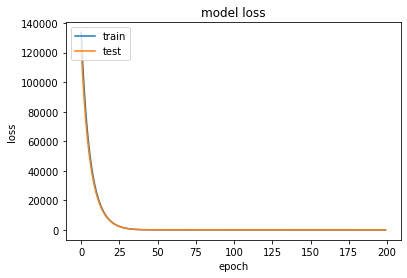

In [20]:
# summarize history for loss

import matplotlib.pyplot as plt

plt.plot(classifier_nn.history['loss'])
plt.plot(classifier_nn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
from sklearn.metrics import r2_score, mean_squared_error

print("Mean Squared Error: \t", mean_squared_error(y_test, Ypredicted))
print("R2 Score: \t\t", r2_score(y_test, Ypredicted))

Mean Squared Error: 	 57.14078711360294
R2 Score: 		 -0.4372066950555602


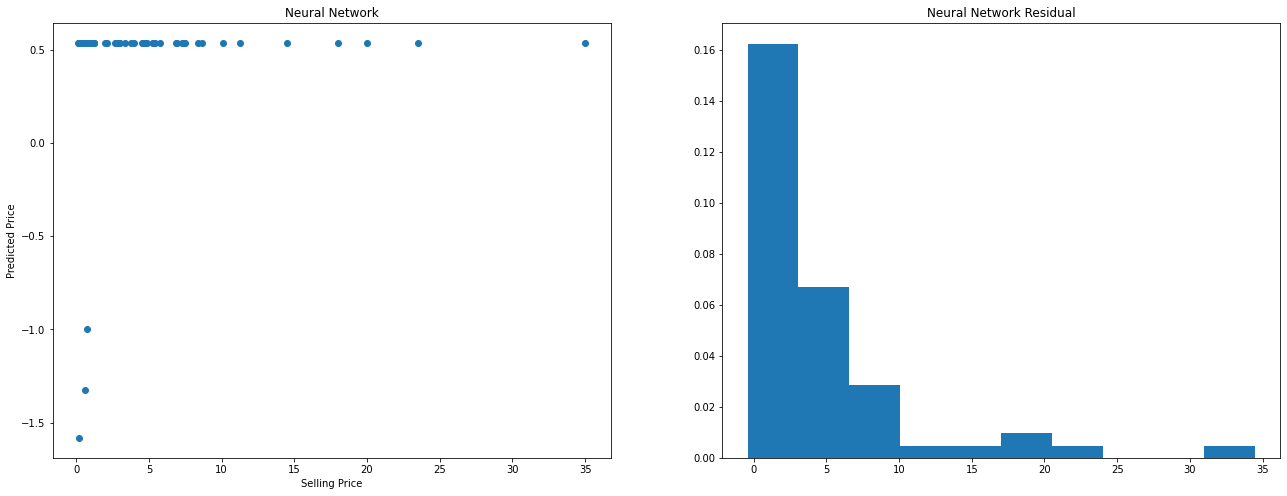

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(22,8))

ax1.scatter(y_test,Ypredicted);
ax1.set_title('Neural Network');
ax1.set_xlabel('Selling Price');
ax1.set_ylabel('Predicted Price');

ax2.set_title('Neural Network Residual');
ax2.hist(y_test-Ypredicted.flatten(), density=True);

# 8. Solution

What is the solution that is proposed to solve the business problem discussed in Section 1. Also share your learnings while working through solving the problem in terms of challenges, observations, decisions made etc.

